# Lab 4 - Hypothesis testing and statistical analysis

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Read the data into a dataframe

In [2]:
df = pd.read_csv('census11sample.csv')
df.head(20)

,Unnamed: 0,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,0,27,32,65,60,44,79,43,8,9
1,1,10,36,40,19,52,46,58,87,40
2,2,82,53,60,34,2,29,18,46,57
3,3,33,63,25,60,9,26,30,52,74
4,4,55,98,4,47,58,37,18,67,19
5,5,27,26,66,70,33,41,38,78,63
6,6,42,44,49,59,40,65,13,8,52
7,7,62,44,41,76,8,74,54,40,72
8,8,34,17,33,71,45,73,1,77,75
9,9,15,46,37,3,13,41,19,47,69


### Remove the "unnamed" column:

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(20)

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
5,27,26,66,70,33,41,38,78,63
6,42,44,49,59,40,65,13,8,52
7,62,44,41,76,8,74,54,40,72
8,34,17,33,71,45,73,1,77,75
9,15,46,37,3,13,41,19,47,69


### We divide the data equally into two dataframes. We will use the sample_explore dataframe to generate a hypothesis, and the sample_test dataframe to prove/disprove it.

In [4]:
df.shape
rows = df.shape[0]
rows

sample_explore = df[df.index<500]
sample_test = df[df.index>=500]

sample_explore.head(500)
# print (sample_explore.values.sum()/4500)
# print (sample_explore['North West'].values.sum()/500)
# north = pd.concat([sample_explore['North West'], sample_explore['North East']], axis=1)
# north
# print (north.values.sum()/1000)

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
495,27,37,30,65,21,20,43,62,48
496,63,39,76,57,47,77,56,64,68
497,62,26,21,69,14,53,3,65,19
498,15,68,4,63,44,7,23,36,8


### We will focus on the percent of elder people in each of the regions. Elder people are considered the people of age 65 or over. Since the number of people asked in each of the regions in sample_explore is 500, we will divide our number (which represents the number of those people) by 5, so that we obtain the percentage. Moreover, we will use some abreviations. For "North East" we will use "NE", for "North West" - "NW" and so on ...

In [5]:
br_nw = 0
for i in sample_explore['North West'].values:
    if (i>=65):
        br_nw+=1
br_nw = br_nw/5
br_nw

16.8

In [6]:
br_ne = 0
for i in sample_explore['North East'].values:
    if (i>=65):
        br_ne+=1
br_ne = br_ne/5
br_ne

16.4

In [7]:
br_yh = 0
for i in sample_explore['Yorkshire and The Humber'].values:
    if (i>=65):
        br_yh+=1
br_yh = br_yh/5
br_yh

15.6

In [8]:
br_em = 0
for i in sample_explore['East Midlands'].values:
    if (i>=65):
        br_em+=1
br_em = br_em/5
br_em

17.6

In [9]:
br_wm = 0
for i in sample_explore['West Midlands'].values:
    if (i>=65):
        br_wm+=1
br_wm = br_wm/5
br_wm

17.8

In [10]:
br_ee = 0
for i in sample_explore['East of England'].values:
    if (i>=65):
        br_ee+=1
br_ee = br_ee/5
br_ee

21.8

In [11]:
br_l = 0
for i in sample_explore['London'].values:
    if (i>=65):
        br_l+=1
br_l = br_l/5
br_l

12.2

In [12]:
br_se = 0
for i in sample_explore['South East'].values:
    if (i>=65):
        br_se+=1
br_se = br_se/5
br_se

18.4

In [13]:
br_sw = 0
for i in sample_explore['South West'].values:
    if (i>=65):
        br_sw+=1
br_sw = br_sw/5
br_sw

21.8

### Now that we have found the percentage of elder people in every region, we will plot the results with a bar plot.

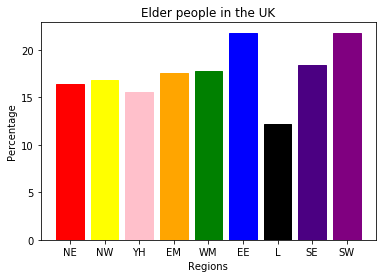

In [14]:
region = ['NE', 'NW', 'YH', 'EM', 'WM', 'EE', 'L', 'SE', 'SW']
percent = [16.4, 16.8, 15.6, 17.6, 17.8, 21.8, 12.2, 18.4, 21.8]
elder = pd.DataFrame([region, percent], ['Region', '%'])
elder = elder.T
elder.set_index('Region', inplace=True)
elder.head()

bars = plt.bar(elder.index, elder['%'])
plt.title('Elder people in the UK')
plt.xlabel('Regions')
plt.ylabel('Percentage')
colours = ['red', 'yellow', 'pink', 'orange', 'green', 'blue',  'black', 'indigo', 'purple']

for i in range(9):
    bars[i].set_color(colours[i])

plt.show()

### Now, after some observations we are ready to state our hypothesis: "In the region of South East of England, the number of elder people (aged $65$ or more) is greater than in North East of England." Anothe formulation could be: "In the region of South East of England, the percentage of elder people (aged $65$ or more) is greater than in North East of England."

### The reason for this hypothesis can be found in the above calculations. We calculated that the percentage of elder people in South East is $18.4\%$ and in North East - $16.4\%.$

### Our null hypothesis $H_0$ will be: The number/percentage of elder people in South East is roughly the same/very close to the number/percentage of elder people in North East. We are going to work at a probability level of $95\%$ (where $\alpha$ = $5\%$).

### We will use Z-test to prove/disprove our hypothesis!

### As we said, we will use the sample_test dataframe for our testing. First of all, we will get all the values in the "North East" column, which are at least 65.

In [15]:
sample_test.head(20)
ne = sample_test[sample_test['North East']>=65]
ne = ne['North East']
ne

507    83
511    76
512    81
518    70
522    69
       ..
976    72
983    75
985    75
987    78
999    73
Name: North East, Length: 89, dtype: int64

### After that, we will calculate the mean and standard deviation. We approximate the values, because they are really close to those.

In [16]:
mean_ne = 0
for i in ne:
    mean_ne += i
mean_ne /= 89
mean_ne
mean_ne = 75.213
mean_ne

75.213

In [17]:
std_ne = 0
for i in ne:
    std_ne += (i-mean_ne)*(i-mean_ne)
    
std_ne /= 88
std_ne = math.sqrt(std_ne)
std_ne = 6.9
std_ne

6.9

### Now we do the same steps and calculations for the "South East" column. 

In [18]:
se = sample_test[sample_test['South East']>=65]
se = se['South East']

mean_se = 0
for i in se:
    mean_se += i
mean_se /= 84

mean_se = 74.69
mean_se
std_se = 0
for i in se:
    std_se += (i-mean_se)*(i-mean_se)
    
std_se /= 83
std_se = math.sqrt(std_se)
std_se = 8


### We will import some libraries and plot the graph of the normal distribution.

In [19]:
from scipy import stats
from scipy.stats import norm
import numpy as np

The 95% confidence interval lies between 3.04 and 6.96.


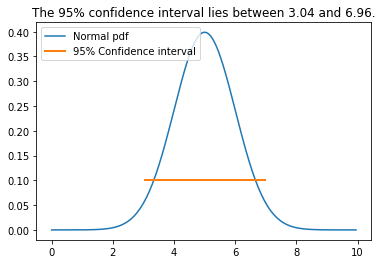

In [20]:
alpha = 0.05
x=np.arange(0,10,0.05)
y=stats.norm.pdf(x,5,1)
plt.plot(x,y,label='Normal pdf')
ci=stats.norm.interval(1-alpha,5,1)
print("The 95%% confidence interval lies between %3.2f and %3.2f." %(ci[0],ci[1]))
plt.plot([ci[0],ci[1]],[0.1,0.1],linewidth=2.0,label="95% Confidence interval")
plt.legend(loc=2)
plt.title("The 95%% confidence interval lies between %3.2f and %3.2f." %(ci[0],ci[1]))
plt.show()

### We will now use the formula in the Z-test for two samples, with respectivelly means $m_1$ and $m_2$, standard deviations $s_1$ and $s_2$ and number of measurements $n_1$ and $n_2$. Here the "ones" are for the South region, and the "twos" - for the North (I just want to say that all the $\LaTeX$ formulas are done on hand by myself):
$$Z = \frac{m_1 - m_2}{\sqrt{\frac{(s_1)^2}{n_1}+\frac{(s_2)^2}{n_2}}}$$

$$m_1 - m_2 = 74.69 - 75.213 = -0.529$$

$$Z = \frac{-0.529}{\sqrt{\frac{64}{84}+\frac{47.61}{89}}}$$

$$Z = \frac{-0.529}{1.139} = -0.46$$

### Since we took $\alpha = 5\% = 0.05$, we need to compute $z_{\alpha/2} = z_{0.025}$. We can either look it up, ot use the graph above to conclude that $z_{0.025} = \pm 1.96$. Since our numerator in $Z$ is negative, we are observing the left tail. Therefore, $z_{0.025} = -1.96.$ We can conclude that our interval of rejection is all the values less than $-1.96$. Since our computed $Z$ does not belong to this interval, we cannot reject it. Thus, we cannot reject the null hypothesis $H_0.$

# Conclusion

### Using the method of $Z-$ test, I found that the null hypothesis $H_0$ cannot be rulled out at $5\%$ level.